In [2]:
%run imports.py

Files already downloaded and verified
Preparing data..
Files already downloaded and verified
GPU available:  False
OS:  linux


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [7]:
sgd=utils.load("bs_128_sch_plateau_inj_zero_tot_100000_step_10000_nexp_5_epoch_160.json")

In [8]:
adam=utils.load("adam_bs_256_inj_zero_tot_100000_step_10000_nexp_5_epoch_160.json")

In [9]:
adagrad=utils.load("adagrad_bs_64_inj_zero_tot_100000_step_10000_nexp_5_epoch_120.json")

In [5]:
rmsprop=utils.load("rmsprop_wd_5e-07_inj_zero_tot_100000_step_10000_nexp_5_epoch_100.json")

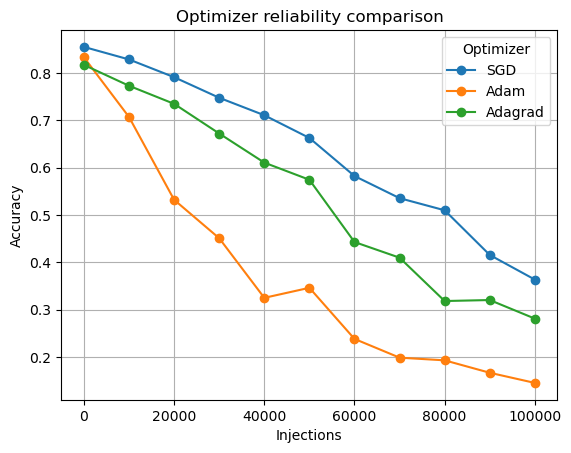

In [16]:
step=10000
x=np.array(range(0,11))*step

plt.plot(x,sgd["avg"],marker="o")
plt.plot(x,adam["avg"],marker="o")
plt.plot(x,adagrad["avg"],marker="o")
optimizers=["SGD","Adam","Adagrad"]
plt.legend(optimizers,title="Optimizer")
plt.title("Optimizer reliability comparison")
plt.ylabel("Accuracy")
plt.xlabel("Injections")
plt.grid()

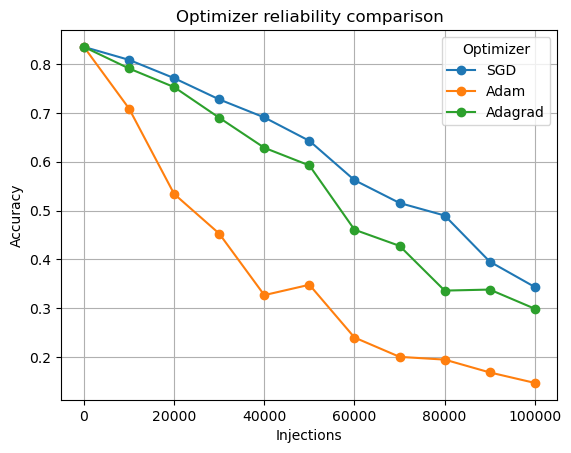

In [21]:
step=10000
x=np.array(range(0,11))*step

init_acc=[]
init_acc.append(sgd["avg"][0])
init_acc.append(adam["avg"][0])
init_acc.append(adagrad["avg"][0])
mean=np.mean(init_acc)

sgd_vals=np.array(sgd["avg"])-sgd["avg"][0]+mean
adam_vals=np.array(adam["avg"])-adam["avg"][0]+mean
adagrad_vals=np.array(adagrad["avg"])-adagrad["avg"][0]+mean

plt.plot(x,sgd_vals,marker="o")
plt.plot(x,adam_vals,marker="o")
plt.plot(x,adagrad_vals,marker="o")
optimizers=["SGD","Adam","Adagrad"]
plt.legend(optimizers,title="Optimizer")
plt.title("Optimizer reliability comparison")
plt.ylabel("Accuracy")
plt.xlabel("Injections")
plt.grid()

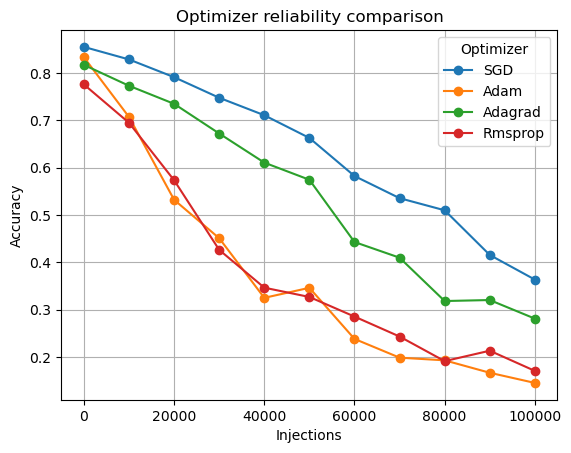

In [10]:
step=10000
x=np.array(range(0,11))*step

plt.plot(x,sgd["avg"],marker="o")
plt.plot(x,adam["avg"],marker="o")
plt.plot(x,adagrad["avg"],marker="o")
plt.plot(x,rmsprop["avg"],marker="o")
optimizers=["SGD","Adam","Adagrad","Rmsprop"]
plt.legend(optimizers,title="Optimizer")
plt.title("Optimizer reliability comparison")
plt.ylabel("Accuracy")
plt.xlabel("Injections")
plt.grid()

In [13]:
sgd_ws=utils.load("bs_128_ws.json")["weight_stats"]
adam_ws=utils.load("adam_bs_256.json")["weight_stats"]
adagrad_ws=utils.load("adagrad_bs_64.json")["weight_stats"]
rmsprop_ws=utils.load("rmsprop_wd_5e-07.json")["weight_stats"]


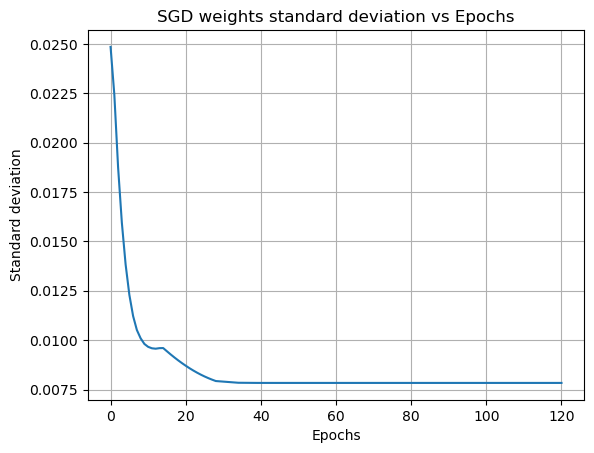

In [12]:
plt.plot(sgd_ws["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("SGD weights standard deviation vs Epochs")
plt.show()

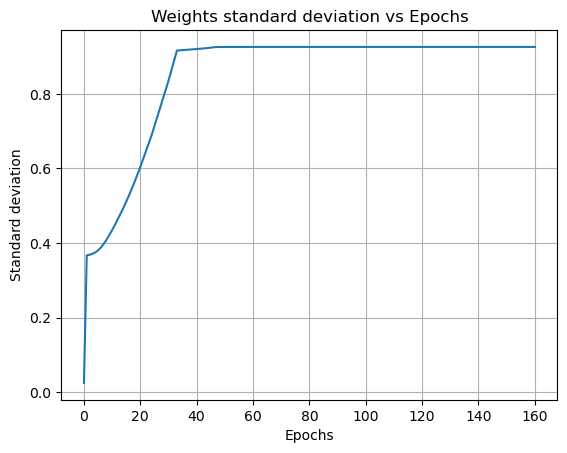

In [26]:
plt.plot(adam_ws["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Adam weights standard deviation vs Epochs")
plt.show()

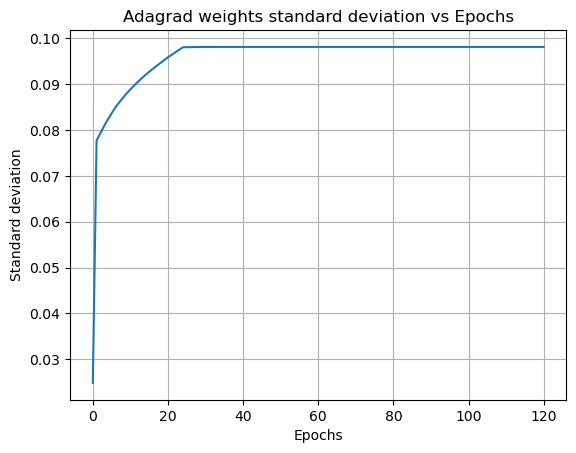

In [30]:
plt.plot(adagrad_ws["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Adagrad weights standard deviation vs Epochs")
plt.show()

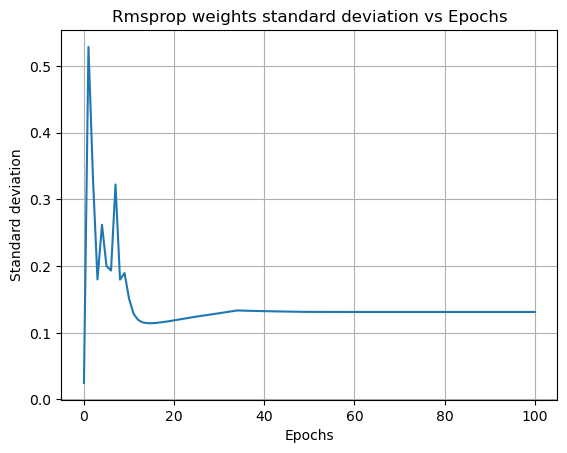

In [15]:
plt.plot(rmsprop_ws["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Rmsprop weights standard deviation vs Epochs")
plt.show()

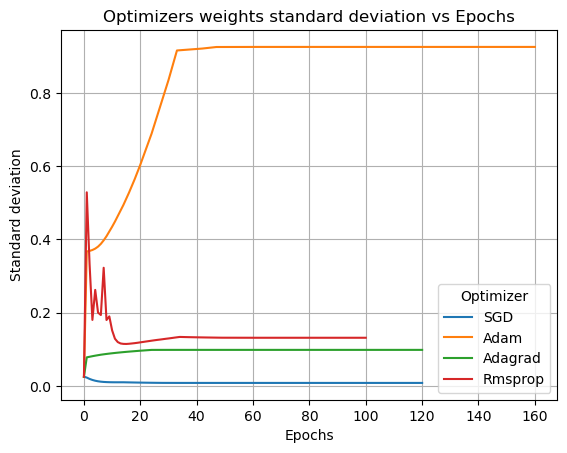

In [17]:
plt.plot(sgd_ws["std"])
plt.plot(adam_ws["std"])
plt.plot(adagrad_ws["std"])
plt.plot(rmsprop_ws["std"])
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Standard deviation")
plt.title("Optimizers weights standard deviation vs Epochs")
optimizers=["SGD","Adam","Adagrad","Rmsprop"]
plt.legend(optimizers,title="Optimizer")
plt.show()